In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
# creating an empty review list
oppo = []

In [7]:
import requests
from bs4 import BeautifulSoup as bs
for i in range (1,21):
    ip=[]
    url ="https://www.amazon.in/product-reviews/B09B4VYY2V/ref=psdc_1805560031_r2_B09B4WNQF8?_encoding=UTF8&showViewpoints=1"+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        ip.append(reviews[i].text)
    oppo = oppo+ip

In [8]:
##Writing reviews in a text file
with open("oppo.txt","w",encoding = 'utf-8') as output:
    output.write(str(oppo))

In [9]:
import os
os.getcwd()

'/content'

In [10]:
## Joining all the reviews into single paragraph
red_rev_string = " ".join(oppo)

In [12]:
import re
##Removing unwanted symbols in case present
red_rev_string = re.sub("[^A-Za-z" "]+"," ",red_rev_string).lower()
red_rev_string =re.sub("[0-9" "]+"," ",red_rev_string)

In [13]:
red_rev_string

' i loved the phone the curved display is good the camera is good performance is good the only con as per the description it charges in min but from my exp of using this phone it only charges to about in min this was disappointing perfect smartphone below k auroras back pattern is eye catchy has awesome display perfect camera with features like bokeh mode in video snappy ui blazed fast powerful in terms of storage and ram management audio quality is good as well and no volume issues and clear voice quality speakers are performing well too good qulitty processor which does every task thrown at it no issues so far no heating issue noted charging speed we found little bit lesser as compared to my earlier flagship device one plus pro my stars go for it as it s simple after a month did not see any issue while using full charge in minsin one time charge hrs battery backupexcellent camera curved display is key of this mobile ram internal storagedon t think much if u like curved display mobile

In [15]:
##Splitting each word with space -- Tokanization
red_rev_words = red_rev_string.split(" ")
red_rev_words

['',
 'i',
 'loved',
 'the',
 'phone',
 'the',
 'curved',
 'display',
 'is',
 'good',
 'the',
 'camera',
 'is',
 'good',
 'performance',
 'is',
 'good',
 'the',
 'only',
 'con',
 'as',
 'per',
 'the',
 'description',
 'it',
 'charges',
 'in',
 'min',
 'but',
 'from',
 'my',
 'exp',
 'of',
 'using',
 'this',
 'phone',
 'it',
 'only',
 'charges',
 'to',
 'about',
 'in',
 'min',
 'this',
 'was',
 'disappointing',
 'perfect',
 'smartphone',
 'below',
 'k',
 'auroras',
 'back',
 'pattern',
 'is',
 'eye',
 'catchy',
 'has',
 'awesome',
 'display',
 'perfect',
 'camera',
 'with',
 'features',
 'like',
 'bokeh',
 'mode',
 'in',
 'video',
 'snappy',
 'ui',
 'blazed',
 'fast',
 'powerful',
 'in',
 'terms',
 'of',
 'storage',
 'and',
 'ram',
 'management',
 'audio',
 'quality',
 'is',
 'good',
 'as',
 'well',
 'and',
 'no',
 'volume',
 'issues',
 'and',
 'clear',
 'voice',
 'quality',
 'speakers',
 'are',
 'performing',
 'well',
 'too',
 'good',
 'qulitty',
 'processor',
 'which',
 'does',
 'ever

In [18]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
red_rev_words = [w for w in red_rev_words if not w in stop_words]

In [20]:
## Joining all the reviews into single paragraph
red_rev_string =" ".join(red_rev_words)

In [22]:
from wordcloud import WordCloud
# WordCloud can be performed on the string inputs. That is the reason we have combined 
# entire reviews into single paragraph
# Simple word cloud

wordcloud_ip = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(red_rev_string)

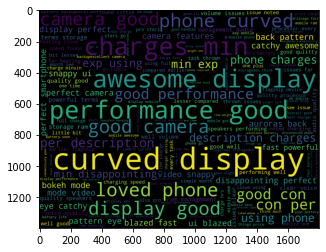

In [24]:
import matplotlib.pyplot as plt
plt.imshow(wordcloud_ip)

In [36]:
# negative words  Choose path for -ve words stored in system
with open("/content/negative-words.txt","r", encoding = 'ISO-8859-1') as neg:
  negwords = neg.read().split("\n")

In [38]:
negwords =negwords[37:]
negwords

['acerbate',
 'acerbic',
 'acerbically',
 'ache',
 'ached',
 'aches',
 'achey',
 'aching',
 'acrid',
 'acridly',
 'acridness',
 'acrimonious',
 'acrimoniously',
 'acrimony',
 'adamant',
 'adamantly',
 'addict',
 'addicted',
 'addicting',
 'addicts',
 'admonish',
 'admonisher',
 'admonishingly',
 'admonishment',
 'admonition',
 'adulterate',
 'adulterated',
 'adulteration',
 'adulterier',
 'adversarial',
 'adversary',
 'adverse',
 'adversity',
 'afflict',
 'affliction',
 'afflictive',
 'affront',
 'afraid',
 'aggravate',
 'aggravating',
 'aggravation',
 'aggression',
 'aggressive',
 'aggressiveness',
 'aggressor',
 'aggrieve',
 'aggrieved',
 'aggrivation',
 'aghast',
 'agonies',
 'agonize',
 'agonizing',
 'agonizingly',
 'agony',
 'aground',
 'ail',
 'ailing',
 'ailment',
 'aimless',
 'alarm',
 'alarmed',
 'alarming',
 'alarmingly',
 'alienate',
 'alienated',
 'alienation',
 'allegation',
 'allegations',
 'allege',
 'allergic',
 'allergies',
 'allergy',
 'aloof',
 'altercation',
 'ambig

In [40]:
##Considering only the words which are present in the positive words
red_pos = " ".join([w for w in red_rev_words if w in negwords])
red_pos

' disappointing issues issues issue issue expensive poor noisy disappointing issues issues issue issue expensive poor noisy disappointing issues issues issue issue expensive poor noisy disappointing issues issues issue issue expensive poor noisy disappointing issues issues issue issue expensive poor noisy disappointing issues issues issue issue expensive poor noisy disappointing issues issues issue issue expensive poor noisy disappointing issues issues issue issue expensive poor noisy disappointing issues issues issue issue expensive poor noisy disappointing issues issues issue issue expensive poor noisy disappointing issues issues issue issue expensive poor noisy disappointing issues issues issue issue expensive poor noisy disappointing issues issues issue issue expensive poor noisy disappointing issues issues issue issue expensive poor noisy disappointing issues issues issue issue expensive poor noisy disappointing issues issues issue issue expensive poor noisy disappointing issues i

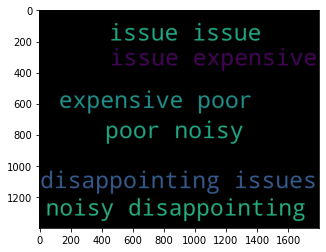

In [41]:
##Building Positive word cloud
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(red_pos)

plt.imshow(wordcloud_pos)

In [44]:
##Unique words
red_unique = list(set(" ".join(oppo).split(" ")))
red_unique

['',
 'charger',
 ',',
 '4.5/5',
 '35k',
 'Is',
 'but',
 '40k.Auroras',
 'for',
 'retainer',
 'curved',
 'overall',
 'was',
 'from',
 'about',
 '40k',
 'stars',
 'no',
 'every',
 'month',
 'pattern',
 'life',
 'backFast',
 'speakers',
 'so',
 '\nBattery',
 'creates',
 'weight',
 'compared',
 'duplicate',
 'any',
 'RAM',
 '6',
 'snappy',
 'my',
 'see',
 'charge',
 'lesser',
 'catchy.Has',
 'performing',
 'far',
 'get',
 'and',
 'not',
 'loyal',
 'expensive\n',
 'mobile12/256',
 'But',
 'we',
 '7pro.My',
 'charger\n',
 'issue',
 'fast',
 '.The',
 '18',
 'simple\n',
 'disconnected',
 'just',
 'using',
 'speed',
 'Ram/internal',
 'below',
 'is',
 'at',
 'much',
 '30min,',
 '.\n',
 'heating',
 "it's",
 'awesome',
 'me',
 'will',
 'I',
 'Item',
 'camera',
 'things',
 'as',
 'exp',
 'storage',
 'well',
 'bit',
 'soon..battery',
 'liked',
 'features',
 '\nMobile',
 'same',
 'processor',
 'backupExcellent',
 'drainage',
 'while',
 'working',
 'realised',
 'Reno',
 'Camera',
 'price',
 'charging

## Emotion mining

In [46]:
#Sentiment analysis
import pandas as pd
afinn = pd.read_csv('/content/Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [49]:
afinn.head(20)

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
5,abductions,-2
6,abhor,-3
7,abhorred,-3
8,abhorrent,-3
9,abhors,-3


In [53]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [54]:
from nltk import tokenize
red_unique = tokenize.sent_tokenize(" ".join(oppo))
red_unique[5:15]

['Charge as very fast but down as same\n \nBattery drainage very fast......overall good but Lil expensive\n \nMobile best charger not working duplicate charger\n \nThe earphone connectivity very poor.',
 'Slight jurk get disconnected from the phone and creates noisy sound.',
 'Excellent battery backFast charging\n \nI liked the phone, and I realised that I am loyal retainer of oppo from A83 to now Reno 6 pro.',
 'Item weight is one enough USP for me with overall performance.',
 'I loved the phone the curved display is good , the camera is good , performance is good .The only con :As per the description it charges 100 in 30min but from my exp of using this phone it only charges to about 50% in 30min, this was disappointing .',
 "Perfect  smartphone  below  40k.Auroras back  pattern is eye catchy.Has awesome display,  perfect  camera with features like Bokeh mode in video,  snappy  UI blazed fast ,Powerful in terms of storage  and RAM management.Audio  quality  is good as well and no vol

In [55]:
sent_df = pd.DataFrame(red_unique, columns=['word'])
sent_df

,word
0,\nI loved the phone the curved display is good...
1,Perfect smartphone below 40k.Auroras back ...
2,"The mobile was awesome, Is display and perform..."
3,It's very good to handled.
4,But battery was down as soon..battery life was...
...,...
274,But battery was down as soon..battery life was...
275,Charge as very fast but down as same\n \nBatte...
276,Slight jurk get disconnected from the phone an...
277,Excellent battery backFast charging\n \nI like...


In [56]:
affinity_scores = afinn.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [57]:
import spacy
spacy.load('en_core_web_sm')
from spacy.lang.en import English

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [58]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        word = nlp(text)
        for word in red_unique:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [59]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [60]:
# test that it works
calculate_sentiment(text = 'amazing')

4

In [61]:
sent_df['sentiment_value'] = sent_df['word'].apply(calculate_sentiment)

In [62]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['word'].str.split().apply(len)
sent_df['word_count'].head(10)

0     50
1    159
2     11
3      5
4     11
5     28
6     11
7     25
8     11
9     50
Name: word_count, dtype: int64

In [63]:
sent_df.sort_values(by='sentiment_value').tail(10)

,word,sentiment_value,word_count
244,Perfect smartphone below 40k.Auroras back ...,22,159
136,Perfect smartphone below 40k.Auroras back ...,22,159
208,Perfect smartphone below 40k.Auroras back ...,22,159
100,Perfect smartphone below 40k.Auroras back ...,22,159
10,Perfect smartphone below 40k.Auroras back ...,22,159
253,Perfect smartphone below 40k.Auroras back ...,22,159
28,Perfect smartphone below 40k.Auroras back ...,22,159
199,Perfect smartphone below 40k.Auroras back ...,22,159
64,Perfect smartphone below 40k.Auroras back ...,22,159
172,Perfect smartphone below 40k.Auroras back ...,22,159


In [64]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    279.000000
mean       5.888889
std        6.768940
min       -1.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       22.000000
Name: sentiment_value, dtype: float64

In [65]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

,word,sentiment_value,word_count
4,But battery was down as soon..battery life was...,0,11
6,Slight jurk get disconnected from the phone an...,-1,11
8,Item weight is one enough USP for me with over...,0,11
13,But battery was down as soon..battery life was...,0,11
15,Slight jurk get disconnected from the phone an...,-1,11


In [66]:
sent_df[sent_df['sentiment_value']>=10].head()

,word,sentiment_value,word_count
0,\nI loved the phone the curved display is good...,10,50
1,Perfect smartphone below 40k.Auroras back ...,22,159
9,"I loved the phone the curved display is good ,...",10,50
10,Perfect smartphone below 40k.Auroras back ...,22,159
18,"I loved the phone the curved display is good ,...",10,50


In [67]:
sent_df['index']=range(0,len(sent_df))

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


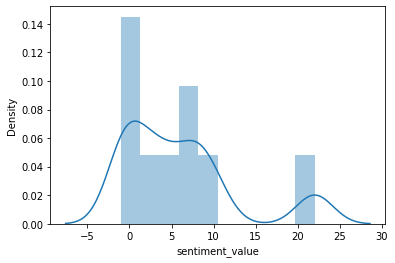

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

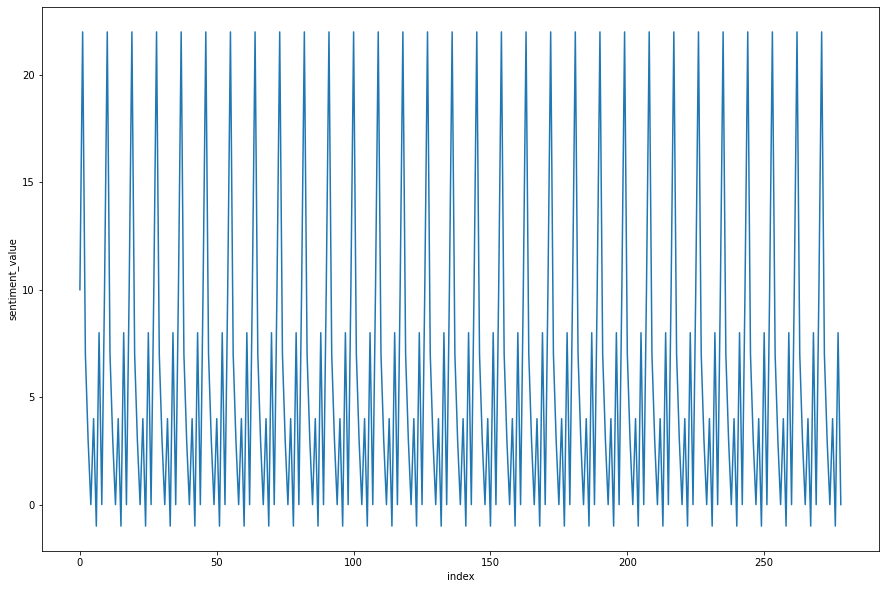

In [69]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)